In [26]:
import numpy as np
import numpy.linalg as nl
from numpy.typing import NDArray
import scipy.linalg as sp
from sympy import Matrix

In [ ]:
np.set_printoptions(precision=15)

In [ ]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [ ]:
![Screenshot%202023-05-19%20at%2015.01.22.png](attachment:Screenshot%202023-05-19%20at%2015.01.22.png)

In [ ]:
def scalar_product_Gramm(v1: NDArray, v2: NDArray, G:NDArray) -> NDArray:
    return v1 @ G @ v2

In [ ]:
scalar_product_Gramm(np.array([-3, -6, -18]), np.array([[-3], [-3], [-15]]), np.array([[9, 13, -3], [13, 20, -3], [-3, -3, 3]]))

![Screenshot%202023-05-19%20at%2015.07.20.png](attachment:Screenshot%202023-05-19%20at%2015.07.20.png)

In [ ]:
def angle_between_vectors_Gramm(v1: NDArray, v2: NDArray, G: NDArray):
    return np.arccos((v1.transpose() @ G @ v2) / ((np.sqrt(v1.transpose() @ G @ v1)) * (np.sqrt(v2.transpose() @ G @ v2))))

In [ ]:
a = np.array([1.0, 1.0, 0.0, 0.0])
b = np.array([-1, 0, -2, -1])
g = np.array([[10.0, 17.0, 7.0, -15.0], [17.0, 30.0, 11.0, -27.0], [7.0, 11.0, 6.0, -9.0], [-15.0, -27.0, -9.0, 25.0]])
angle_between_vectors_Gramm(a, b, g)

![Screenshot%202023-05-22%20at%2016.30.57.png](attachment:Screenshot%202023-05-22%20at%2016.30.57.png)

In [ ]:
def basis_switch(G: NDArray, T: NDArray) -> NDArray:
    return T.transpose() @ G @ T

In [ ]:
G = np.array([[4, 6, 2], [6, 11, 2], [2, 2, 2]])
T = np.array([[7, 12, -14], 
              [-4, -7, 8], 
              [-4, -6, 7]])
basis_switch(G, T)

![Screenshot%202023-05-24%20at%2020.51.25.png](attachment:Screenshot%202023-05-24%20at%2020.51.25.png)

In [ ]:
def scalar_product_other_basis(G: NDArray, E: NDArray, Enew: NDArray, v1: NDArray, v2: NDArray) -> NDArray[int]:
    T = nl.inv(E) @ Enew
    Gnew = basis_switch(G, T)
    return v1 @ Gnew @ v2.transpose()

In [ ]:
G = np.array([[4, 6], [6, 10]])
E = np.array([[-1, -1], [1, 2]])
Enew = np.array([[-1, -1], [-1, 0]])
v1 = np.array([2, 4])
v2 = np.array([-4, -3])
scalar_product_other_basis(G, E, Enew, v1, v2)

![Screenshot%202023-05-24%20at%2020.59.17.png](attachment:Screenshot%202023-05-24%20at%2020.59.17.png)

In [ ]:
def proj(a: NDArray, b: NDArray, G: NDArray) -> NDArray:
    return (scalar_product_Gramm(a, b, G) / scalar_product_Gramm(b, b, G)) * b

In [ ]:
Q = np.array([[2, -6, 3], [6, 3, 2], [3, -2, -6]])
A = np.array([[2, 8, 23], [-6, -3, -41], [3, 5, 17]])
R = 1/7 * (Q @ A)
Q.transpose() @ (R * 1/7)

In [ ]:
# L = Matrix([[1, 3, 1, 5, 0], [2, -3, 2, 1, 0]])
# L.rref()
G = np.eye(4)
x = np.array([1, -2, 0, 1])
u = np.array([1, 3, 1, 5])
v = np.array([2, -3, 2, 1])
scalar_product_Gramm(u, v, G)

In [ ]:

Q = 1/2 * Matrix([[1, 1, -np.sqrt(2)], [1, 1, np.sqrt(2)], [np.sqrt(2), -np.sqrt(2), 0]])
Qnp = 1/2 * np.array([[1, 1, -np.sqrt(2)], [1, 1, np.sqrt(2)], [np.sqrt(2), -np.sqrt(2), 0]])
S = np.array([[-1, -1, 0], [complex(0, 1), complex(0, -1), 1], [complex(0, -1), complex(0, 1), 1]])
sp.inv(S) @ Qnp @ S

In [ ]:
def gramm_norm(v: NDArray, G: NDArray) -> NDArray:
    return np.sqrt(v.transpose() @ G @ v)

In [ ]:
L = np.array([[-2, 6, 6], [0, 0, 1], [1, -3, -4], [1, -1, -1]])
G = np.array([[6, 11, 9, 5], [11, 22, 17, 9], [9, 17, 14, 7], [5, 9, 7, 5]])
v1 = L[:, 0]
v2 = L[:, 1] - proj(L[:, 1], v1, G)
v3 = L[:, 2] - proj(L[:, 2], v1, G) - proj(L[:, 2], v2, G)
*(v1 * (1/gramm_norm(v1, G))), *(v2 * (1 / gramm_norm(v2, G))), *(v3 * (1 / gramm_norm(v3, G)))

In [ ]:
L = np.array([[1, -3, 1], [-1, 1, 0], [1, -3, 1], [-2, 0, 1]])
G = np.eye(4)
v1 = L[:, 0]
v2 = L[:, 1] - proj(L[:, 1], v1, G)
v3 = L[:, 2] - proj(L[:, 2], v1, G) - proj(L[:, 2], v2, G)
v1, v2, v3

In [ ]:
L = np.array([-2, 6, 0, 0])
# Gauss it -> write first vector -> complete the subspace with std basis vectors

In [ ]:
import numpy as np
import numpy.linalg.linalg

a1 = np.array([[-2],
               [0],
               [-5],
               [-2]])

a2 = np.array([[-3],
               [1],
               [-6],
               [-3]])

a3 = np.array([[0],
               [0],
               [0],
               [0]])

G = np.array([[10, -3, 21, 11],
              [-3, 2, -5, -3],
              [21, -5, 46, 23],
              [11, -3, 23, 13]])

Gobr = numpy.linalg.inv(G)

v1 = Gobr @ a1
v2 = Gobr @ a2
v3 = Gobr @ a3

np.set_printoptions(precision=0, suppress=True)
v1, v2, v3

In [ ]:
v = np.array([[-3, 6, 9, -6]])
L = Matrix([[12, 6, -3], [-24, -15, 6], [-30, -21, 6], [27, 15, -9]])


In [ ]:
L = np.array([[-3, -3, 3], [3, 6, -3], [-12, -15, 9], [21, 24, -18]])
G = np.array([[19, -33, 13, 29], [-33, 59, -21, -53], [13, -21, 11, 17], [29, -53, 17, 49]])
y = np.array([-3, 0, -3, 9])
# Find orthogonal projection of y onto L
x1, x2, x3 = L[:, 0], L[:, 1], L[:, 2]
M = Matrix([[x1 @ G @ x1, x1 @ G @ x2, x1 @ G @ x3, y @ G @ x1], [x2 @ G @ x1, x2 @ G @ x2, x2 @ G @ x3, y @ G @ x2], [x3 @ G @ x1, x3 @ G @ x2, x3 @ G @ x3, y @ G @ x3]])
a1, a2, a3 = 12/151, -68/151, -153/151
aL = a1 * x1 + a2 * x2 + a3 * x3
aL

In [ ]:
L = np.array([[-4, 2], [-2, 2], [14, -8]])
G = np.array([[6, -3, -1], [-3, 2, 1], [-1, 1, 1]])
y = np.array([-4, -2, 12])
# Find orthogonal projection of y onto L
x1, x2 = L[:, 0], L[:, 1]
M = Matrix([[x1 @ G @ x1, x1 @ G @ x2, y @ G @ x1], [x2 @ G @ x1, x2 @ G @ x2, y @ G @ x2]])
M.rref()
a1, a2 = 21/17, 12/17
aL = a1 * x1 + a2 * x2
aL

In [7]:
def angle_between_vectors_Gramm(v1: NDArray, v2: NDArray, G: NDArray):
    return np.arccos((v1.transpose() @ G @ v2) / ((np.sqrt(v1.transpose() @ G @ v1)) * (np.sqrt(v2.transpose() @ G @ v2))))

In [8]:
a = np.array([1.0, 1.0, 0.0, 0.0])
b = np.array([-1, 0, -2, -1])
g = np.array([[10.0, 17.0, 7.0, -15.0], [17.0, 30.0, 11.0, -27.0], [7.0, 11.0, 6.0, -9.0], [-15.0, -27.0, -9.0, 25.0]])
angle_between_vectors_Gramm(a, b, g)

2.132600117578988

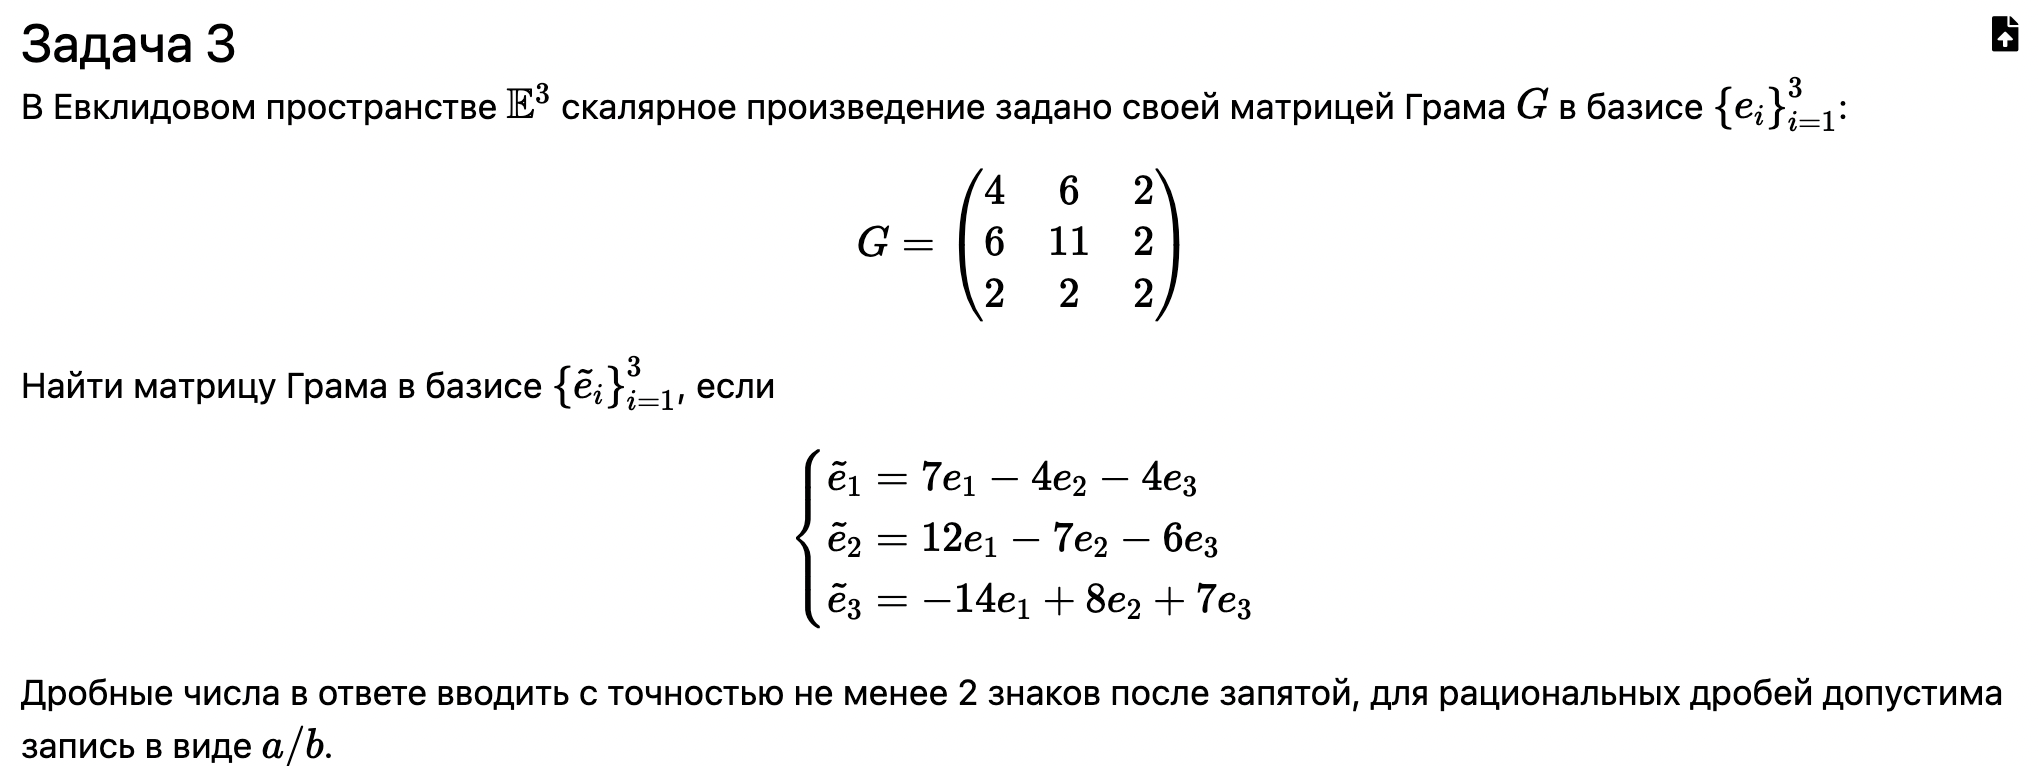

In [11]:
def basis_switch(G: NDArray, T: NDArray) -> NDArray:
    return T.transpose() @ G @ T

In [12]:
G = np.array([[4, 6, 2], [6, 11, 2], [2, 2, 2]])
T = np.array([[7, 12, -14], 
              [-4, -7, 8], 
              [-4, -6, 7]])
basis_switch(G, T)

array([[ 20,  34, -38],
       [ 34,  59, -66],
       [-38, -66,  74]])

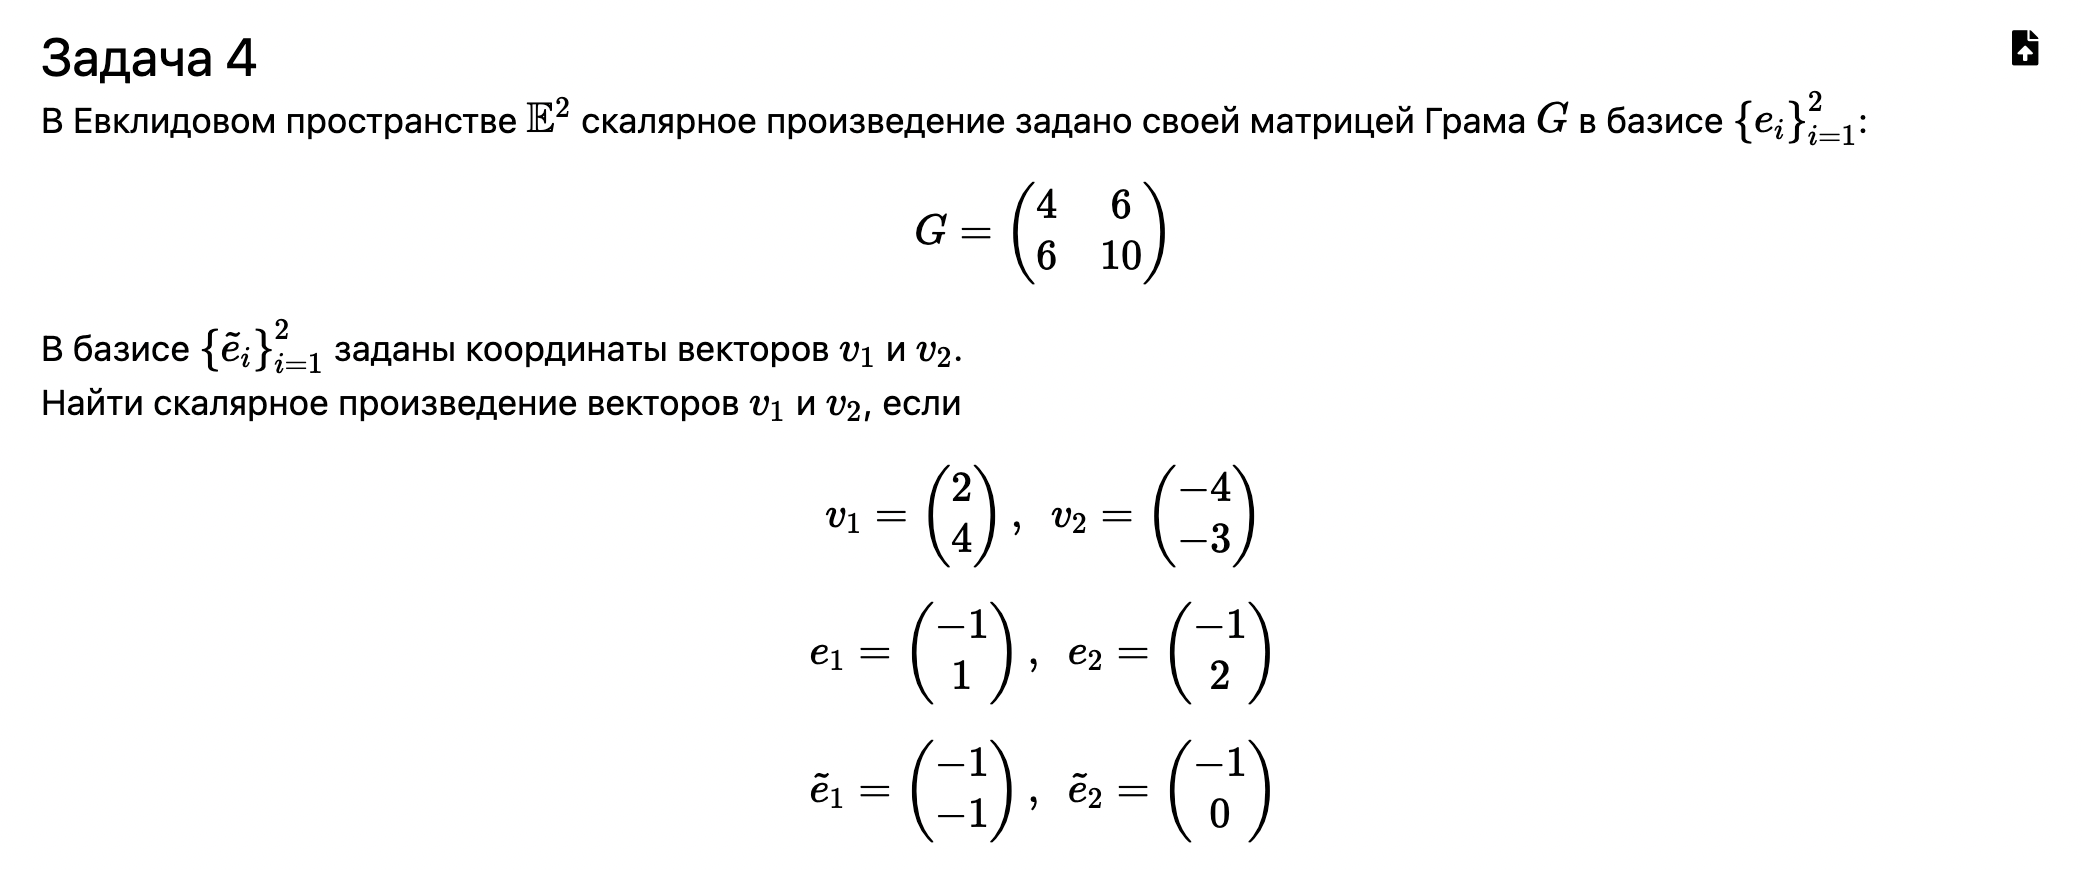

In [15]:
def scalar_product_other_basis(G: NDArray, E: NDArray, Enew: NDArray, v1: NDArray, v2: NDArray) -> NDArray[int]:
    T = nl.inv(E) @ Enew
    Gnew = basis_switch(G, T)
    return v1 @ Gnew @ v2.transpose()

In [18]:
G = np.array([[4, 6], [6, 10]])
E = np.array([[-1, -1], [1, 2]])
Enew = np.array([[-1, -1], [-1, 0]])
v1 = np.array([2, 4])
v2 = np.array([-4, -3])
scalar_product_other_basis(G, E, Enew, v1, v2)

-100.0

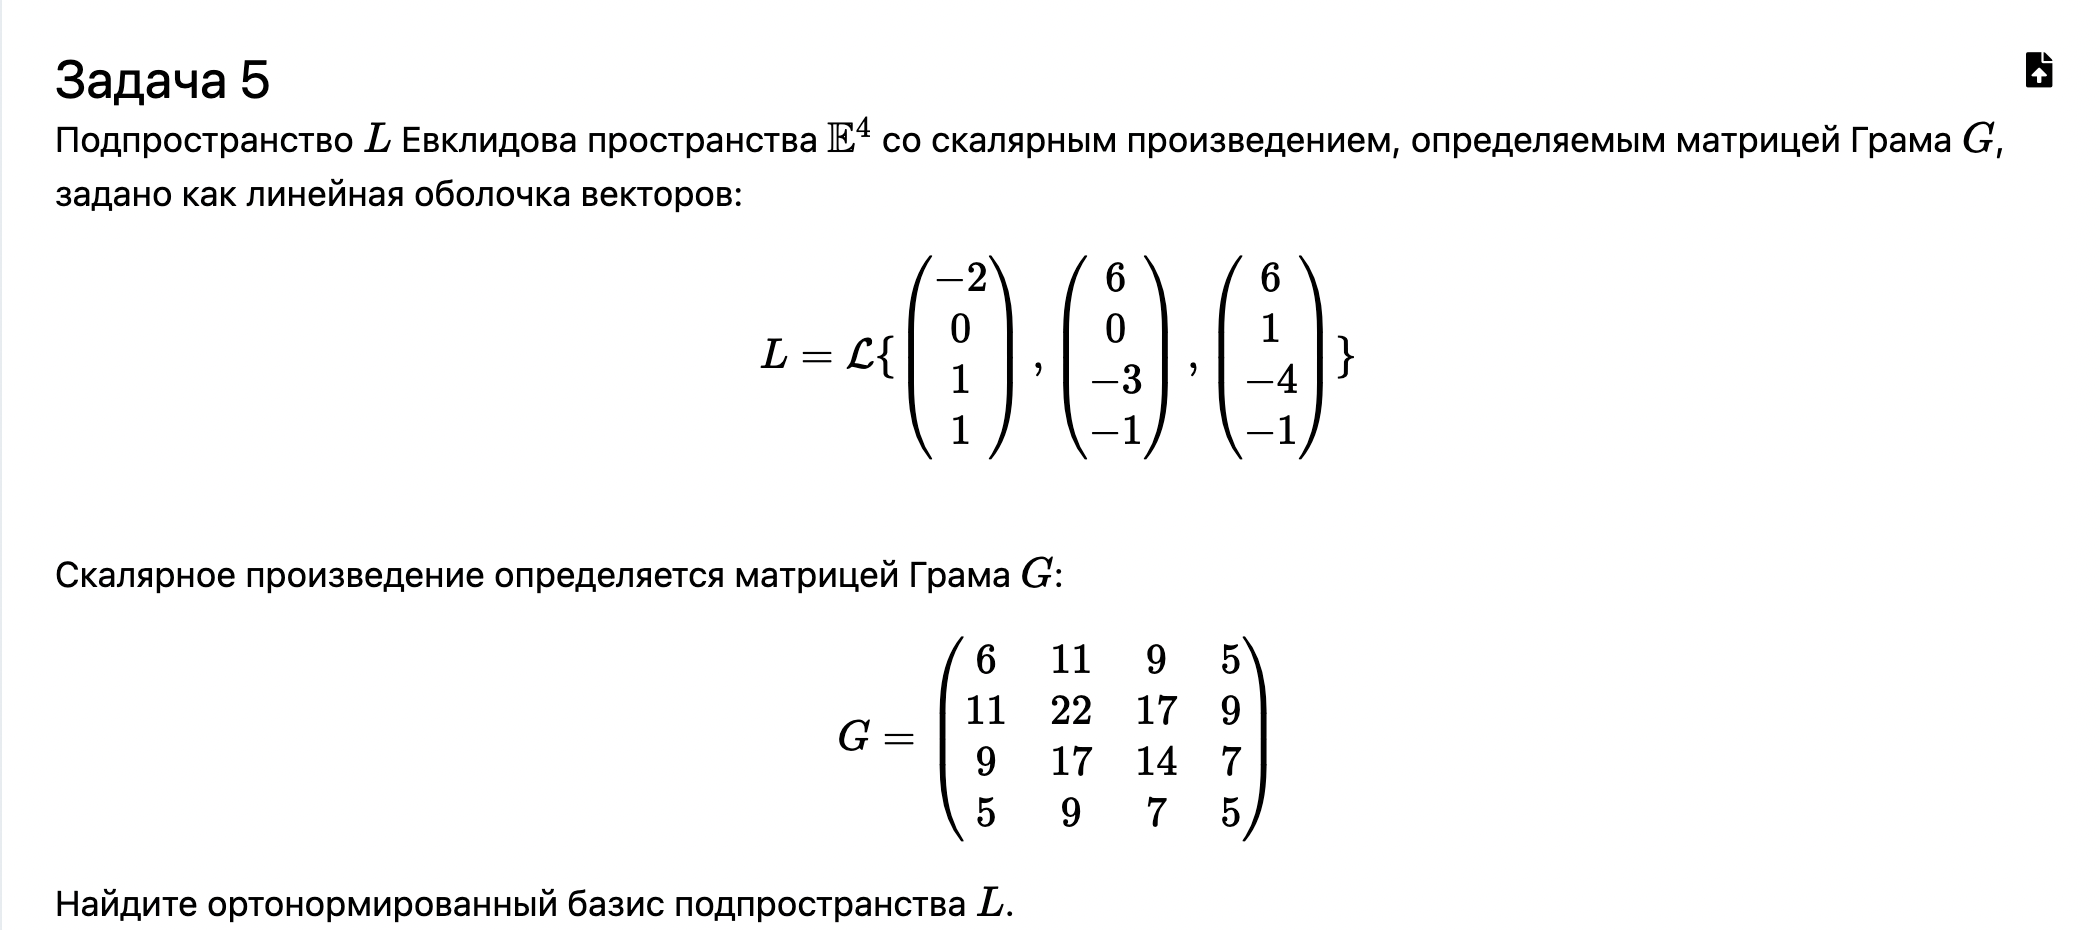

In [131]:
def proj(a: NDArray, b: NDArray, G: NDArray) -> NDArray:
    return (scalar_product_Gramm(a, b, G) / scalar_product_Gramm(b, b, G)) * b

In [158]:
Q = np.array([[2, -6, 3], [6, 3, 2], [3, -2, -6]])
A = np.array([[2, 8, 23], [-6, -3, -41], [3, 5, 17]])
R = 1/7 * (Q @ A)
Q.transpose() @ (R * 1/7)

array([[  2.,   8.,  23.],
       [ -6.,  -3., -41.],
       [  3.,   5.,  17.]])

In [166]:
# L = Matrix([[1, 3, 1, 5, 0], [2, -3, 2, 1, 0]])
# L.rref()
G = np.eye(4)
x = np.array([1, -2, 0, 1])
u = np.array([1, 3, 1, 5])
v = np.array([2, -3, 2, 1])
scalar_product_Gramm(u, v, G)

0.0

In [175]:

Q = 1/2 * Matrix([[1, 1, -np.sqrt(2)], [1, 1, np.sqrt(2)], [np.sqrt(2), -np.sqrt(2), 0]])
Qnp = 1/2 * np.array([[1, 1, -np.sqrt(2)], [1, 1, np.sqrt(2)], [np.sqrt(2), -np.sqrt(2), 0]])
S = np.array([[-1, -1, 0], [complex(0, 1), complex(0, -1), 1], [complex(0, -1), complex(0, 1), 1]])
sp.inv(S) @ Qnp @ S

array([[ 0.-1.j,  0.+1.j,  0.-0.j],
       [ 0.-1.j,  0.+1.j,  0.+0.j],
       [-1.-0.j, -1.+0.j,  0.+0.j]])

In [17]:
def gramm_norm(v: NDArray, G: NDArray) -> NDArray:
    return np.sqrt(v.transpose() @ G @ v)

In [21]:
L = np.array([[-2, 6, 6], [0, 0, 1], [1, -3, -4], [1, -1, -1]])
G = np.array([[6, 11, 9, 5], [11, 22, 17, 9], [9, 17, 14, 7], [5, 9, 7, 5]])
v1 = L[:, 0]
v2 = L[:, 1] - proj(L[:, 1], v1, G)
v3 = L[:, 2] - proj(L[:, 2], v1, G) - proj(L[:, 2], v2, G)
*(v1 * (1/gramm_norm(v1, G))), *(v2 * (1 / gramm_norm(v2, G))), *(v3 * (1 / gramm_norm(v3, G)))

(-2.0, 0.0, 1.0, 1.0, 4.0, 0.0, -2.0, -1.0, 2.0, 1.0, -2.0, -1.0)

In [35]:
L = np.array([[1, -3, 1], [-1, 1, 0], [1, -3, 1], [-2, 0, 1]])
G = np.eye(4)
v1 = L[:, 0]
v2 = L[:, 1] - proj(L[:, 1], v1, G)
v3 = L[:, 2] - proj(L[:, 2], v1, G) - proj(L[:, 2], v2, G)
v1, v2, v3

(array([ 1, -1,  1, -2]), array([-2.,  0., -2., -2.]), array([0., 0., 0., 0.]))

In [40]:
L = np.array([-2, 6, 0, 0])
# Gauss it -> write first vector -> complete the subspace with std basis vectors

In [105]:
import numpy as np
import numpy.linalg.linalg

a1 = np.array([[-2],
               [0],
               [-5],
               [-2]])

a2 = np.array([[-3],
               [1],
               [-6],
               [-3]])

a3 = np.array([[0],
               [0],
               [0],
               [0]])

G = np.array([[10, -3, 21, 11],
              [-3, 2, -5, -3],
              [21, -5, 46, 23],
              [11, -3, 23, 13]])

Gobr = numpy.linalg.inv(G)

v1 = Gobr @ a1
v2 = Gobr @ a2
v3 = Gobr @ a3

np.set_printoptions(precision=0, suppress=True)
v1, v2, v3

(array([[-4.],
        [-2.],
        [ 1.],
        [ 1.]]),
 array([[-10.],
        [ -4.],
        [  3.],
        [  2.]]),
 array([[0.],
        [0.],
        [0.],
        [0.]]))

In [126]:
v = np.array([[-3, 6, 9, -6]])
L = Matrix([[12, 6, -3], [-24, -15, 6], [-30, -21, 6], [27, 15, -9]])


[]

In [99]:
L = np.array([[-3, -3, 3], [3, 6, -3], [-12, -15, 9], [21, 24, -18]])
G = np.array([[19, -33, 13, 29], [-33, 59, -21, -53], [13, -21, 11, 17], [29, -53, 17, 49]])
y = np.array([-3, 0, -3, 9])
# Find orthogonal projection of y onto L
x1, x2, x3 = L[:, 0], L[:, 1], L[:, 2]
M = Matrix([[x1 @ G @ x1, x1 @ G @ x2, x1 @ G @ x3, y @ G @ x1], [x2 @ G @ x1, x2 @ G @ x2, x2 @ G @ x3, y @ G @ x2], [x3 @ G @ x1, x3 @ G @ x2, x3 @ G @ x3, y @ G @ x3]])
a1, a2, a3 = 12/151, -68/151, -153/151
aL = a1 * x1 + a2 * x2 + a3 * x3
aL

array([-1.9271523179,  0.5761589404, -3.3178807947,  9.0993377483])

In [117]:
L = np.array([[-4, 2], [-2, 2], [14, -8]])
G = np.array([[6, -3, -1], [-3, 2, 1], [-1, 1, 1]])
y = np.array([-4, -2, 12])
# Find orthogonal projection of y onto L
x1, x2 = L[:, 0], L[:, 1]
M = Matrix([[x1 @ G @ x1, x1 @ G @ x2, y @ G @ x1], [x2 @ G @ x1, x2 @ G @ x2, y @ G @ x2]])
M.rref()
a1, a2 = 21/17, 12/17
aL = a1 * x1 + a2 * x2
aL

array([-4., -1., 12.])